In [1]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

2024-12-30 19:40:48.136728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-30 19:40:48.216225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-30 19:40:48.241249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-30 19:40:48.420192: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-30 19:40:50.112746: W tensorflow/compiler/tf2

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


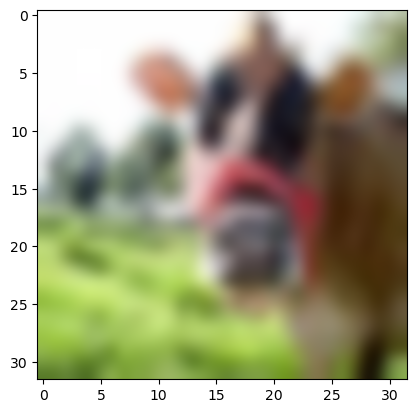

In [3]:
image = X_train[0]

plt.imshow(image, interpolation='bicubic')

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# count unique classes

n_classes = len(np.unique(y_train))

n_classes

100

In [7]:
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [8]:
modelo = Sequential()

modelo.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
modelo.add(Conv2D(32, (3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(100, activation='softmax'))

/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

2024-12-30 18:35:31.774830: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-12-30 18:35:33.453090: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20000000 exceeds 10% of free system memory.


Epoch 1/10
   3/1563 ━━━━━━━━━━━━━━━━━━━━ 1:58 76ms/step - accuracy: 0.0365 - loss: 4.6054

2024-12-30 18:35:35.764400: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21415680 exceeds 10% of free system memory.
2024-12-30 18:35:35.764548: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21415680 exceeds 10% of free system memory.
2024-12-30 18:35:35.778497: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20995200 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 54ms/step - accuracy: 0.0642 - loss: 4.1786 - val_accuracy: 0.2167 - val_loss: 3.2641
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.2229 - loss: 3.1971 - val_accuracy: 0.2959 - val_loss: 2.8773
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.2924 - loss: 2.8271 - val_accuracy: 0.3222 - val_loss: 2.7180
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.3373 - loss: 2.6102 - val_accuracy: 0.3617 - val_loss: 2.5127
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.3742 - loss: 2.4355 - val_accuracy: 0.3810 - val_loss: 2.4173
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.3984 - loss: 2.2909 - val_accuracy: 0.3953 - val_loss: 2.3794
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4239 - loss: 2.1928 - val_accuracy: 0.3975 - val_loss: 2.3812
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.4424 - loss: 2.08

In [10]:
previsoes = modelo.predict(X_test)

previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[1.97943166e-07, 4.05097417e-05, 1.21380039e-03, ...,
        9.00465064e-04, 1.22668606e-03, 8.28688219e-03],
       [2.80455924e-06, 4.87778743e-04, 2.85337941e-04, ...,
        2.18982752e-02, 4.75304609e-04, 3.54796718e-03],
       [3.02163971e-05, 1.38188640e-04, 1.53173767e-02, ...,
        6.16749923e-04, 9.77211981e-04, 4.91963365e-05],
       ...,
       [4.87436191e-04, 8.76495324e-04, 2.56793952e-04, ...,
        1.30739983e-03, 4.61333620e-05, 6.52357889e-03],
       [3.82923503e-07, 4.43657837e-06, 8.00573180e-05, ...,
        4.25194995e-03, 8.22881993e-05, 2.68761367e-02],
       [4.68663685e-03, 1.34024750e-02, 2.53601675e-03, ...,
        1.10340125e-05, 2.90557567e-04, 6.18178979e-04]], dtype=float32)

In [11]:
previsoes_final = np.argmax(previsoes, axis=1)

previsoes_final

array([30, 80, 27, ..., 51, 42, 70])

In [12]:
y_test_classes = np.argmax(y_test, axis=1)

y_test_classes

array([49, 33, 72, ..., 51, 42, 70])

In [13]:
print('Acurácia: ', accuracy_score(y_test_classes, previsoes_final))

Acurácia:  0.4171


In [14]:
print('Matriz de confusão: \n', confusion_matrix(y_test_classes, previsoes_final))

Matriz de confusão: 
 [[80  0  1 ...  0  0  0]
 [ 2 50  1 ...  0  0  0]
 [ 0  0 32 ...  0  5  1]
 ...
 [ 0  0  0 ... 37  1  0]
 [ 1  1  5 ...  1 17  0]
 [ 1  0  0 ...  0  1 35]]
